# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [122]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [123]:
# frequency table for prestige and whether or not someone was admitted

pd.DataFrame(df.groupby(['prestige','admit']).size().rename('counts'))

counts
prestige admit        
1.0      0          28
         1          33
2.0      0          95
         1          53
3.0      0          93
         1          28
4.0      0          55
         1          12

## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [124]:
#df = df.join(pd.get_dummies(df['prestige'],prefix='pres'))
#df.head()
dummy_ranks = pd.get_dummies(df['prestige'],prefix='pres')
dummy_ranks.head()

,pres_1.0,pres_2.0,pres_3.0,pres_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: For prestige, the number of columns we add is the number of different prestige values minus one

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [125]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.loc[:, 'pres_1.0':])
print handCalc.head(10)

   admit    gre   gpa  pres_1.0  pres_2.0  pres_3.0  pres_4.0
0      0  380.0  3.61         0         0         1         0
1      1  660.0  3.67         0         0         1         0
2      1  800.0  4.00         1         0         0         0
3      1  640.0  3.19         0         0         0         1
4      0  520.0  2.93         0         0         0         1
5      1  760.0  3.00         0         1         0         0
6      1  560.0  2.98         1         0         0         0
7      0  400.0  3.08         0         1         0         0
8      1  540.0  3.39         0         0         1         0
9      0  700.0  3.92         0         1         0         0


In [126]:
# crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
pd.crosstab(handCalc['admit'], handCalc['pres_1.0'])

pres_1.0,0,1
admit,,
0,243,28
1,93,33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [127]:
oddsOne = float(len(handCalc[(handCalc['pres_1.0'] == 1) & (handCalc['admit'] == 1)]))\
    /float(len(handCalc[(handCalc['pres_1.0'] == 1) & (handCalc['admit'] != 1)]))
oddsOne

1.1785714285714286

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [128]:
oddsNotOne = float(len(handCalc[(handCalc['pres_1.0'] != 1) & (handCalc['admit'] == 1)]))\
    /float(len(handCalc[(handCalc['pres_1.0'] != 1) & (handCalc['admit'] != 1)]))
oddsNotOne

0.38271604938271603

#### 3.3 Calculate the odds ratio

In [129]:
print oddsOne / (oddsOne + 1)
print oddsNotOne / (oddsNotOne + 1)

0.540983606557
0.276785714286


In [130]:
print "odds ratio"
print float(243*33)/float(93*28)

odds ratio
3.07949308756


In [131]:
print "odds ratio"
print oddsOne/oddsNotOne

odds ratio
3.07949308756


#### 3.4 Write this finding in a sentenance: 

Answer: The odds of the outcome "admitted" is 3x when the variable "pres_1.0" is present.  You're odds to getting admitted increase 3x when you go to a top school.

#### 3.5 Print the cross tab for prestige_4

In [132]:
# crosstab prestige 4 admission 
# frequency table cutting prestige and whether or not someone was admitted
pd.crosstab( handCalc['pres_4.0'],handCalc['admit'])

admit,0,1
pres_4.0,,
0,216,114
1,55,12


#### 3.6 Calculate the OR 

In [133]:
oddsFour = float(len(handCalc[(handCalc['pres_4.0'] == 1) & (handCalc['admit'] == 1)]))\
    /float(len(handCalc[(handCalc['pres_4.0'] == 1) & (handCalc['admit'] != 1)]))
print oddsFour
oddsNotFour = float(len(handCalc[(handCalc['pres_4.0'] != 1) & (handCalc['admit'] == 1)]))\
    /float(len(handCalc[(handCalc['pres_4.0'] != 1) & (handCalc['admit'] != 1)]))
print oddsNotFour
print
print "probabilities"
print oddsFour / (oddsFour + 1)
print oddsNotFour / (oddsNotFour + 1)
print
print "odds ratio"
print float(216*12)/float(55*114)
print "odds ratio"
print oddsFour/oddsNotFour

0.218181818182
0.527777777778

probabilities
0.179104477612
0.345454545455

odds ratio
0.413397129187
odds ratio
0.413397129187


#### 3.7 Write this finding in a sentence

Answer: You're odds are cut in half for admission if you go to a #4 ranked college.

## Part 4. Analysis

In [134]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'pres_2.0':])
print data.head()

   admit    gre   gpa  pres_2.0  pres_3.0  pres_4.0
0      0  380.0  3.61         0         1         0
1      1  660.0  3.67         0         1         0
2      1  800.0  4.00         0         0         0
3      1  640.0  3.19         0         0         1
4      0  520.0  2.93         0         0         1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [135]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [136]:
train_cols = data.columns[1:]
print train_cols

Index([u'gre', u'gpa', u'pres_2.0', u'pres_3.0', u'pres_4.0', u'intercept'], dtype='object')


#### 4.2 Fit the model

In [137]:
import statsmodels.api as sm 

mod = sm.Logit(data['admit'], data[train_cols])
result = mod.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [138]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Fri, 08 Sep 2017   Pseudo R-squ.:                 0.08166
Time:                        10:49:19   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa            0.7793      0.333      2.344      0.019       0.128       1.431
pres_2.0      -0.6801      0.317     -2.146      0.0

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [23]:
conf = pd.DataFrame()

In [24]:
conf['coef'] = result.params

In [25]:
conf['OR'] = np.exp(result.params)

In [26]:
conf[['2.5%', '97.5%']] = result.conf_int()

In [27]:
conf

,coef,OR,2.5%,97.5%
gre,0.002218,1.002221,0.000074,0.004362
gpa,0.779337,2.180027,0.127619,1.431056
pres_2.0,-0.680137,0.506548,-1.301337,-0.058936
pres_3.0,-1.338677,0.262192,-2.014579,-0.662776
pres_4.0,-1.553411,0.211525,-2.371624,-0.735197
intercept,-3.876854,0.020716,-6.116077,-1.637631


#### 4.5 Interpret the OR of Prestige_2

Answer: The odds of being admitted decrease by about 50 percent if the school is of prestige 2

#### 4.6 Interpret the OR of GPA

Answer: Per point incrase in GPA, the odds of being addmitted roughly double.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [139]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [140]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
combos.columns = ['gre', 'gpa', 'pres','int']
combos.head()

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


,gre,gpa,pres,int
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0


#### 5.1 Recreate the dummy variables

In [141]:
# recreate the dummy variables
df = combos.join(pd.get_dummies(combos['pres'],prefix='pres'))
df['intercept'] = df['int']

# keep only what we need for making predictions
del df['pres_1.0']
del df['pres']
del df['int']
df.head()

,gre,gpa,pres_2.0,pres_3.0,pres_4.0,intercept
0,220.0,2.260000,0,0,0,1.0
1,220.0,2.260000,1,0,0,1.0
2,220.0,2.260000,0,1,0,1.0
3,220.0,2.260000,0,0,1,1.0
4,220.0,2.453333,0,0,0,1.0


#### 5.2 Make predictions on the enumerated dataset

In [143]:
df['admit_pred'] = result.predict(df[train_cols])
print df.head()

     gre       gpa  pres_2.0  pres_3.0  pres_4.0  intercept  admit_pred
0  220.0  2.260000         0         0         0        1.0    0.164173
1  220.0  2.260000         1         0         0        1.0    0.090492
2  220.0  2.260000         0         1         0        1.0    0.048977
3  220.0  2.260000         0         0         1        1.0    0.039890
4  220.0  2.453333         0         0         0        1.0    0.185907


#### 5.3 Interpret findings for the last 4 observations

In [144]:
df[-4:]

,gre,gpa,pres_2.0,pres_3.0,pres_4.0,intercept,admit_pred
396,800.0,4.0,0,0,0,1.0,0.734040
397,800.0,4.0,1,0,0,1.0,0.582995
398,800.0,4.0,0,1,0,1.0,0.419833
399,800.0,4.0,0,0,1,1.0,0.368608


Answer: For a student with a perfect GPA/GRE/Undergrad College prestige, we predict a 73% chance of being admitted to a grad school.  For lower prestiges, we predict 58, 42, and 37 respectively.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

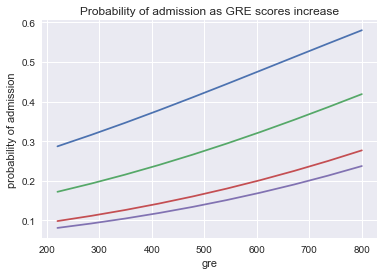

In [162]:
from matplotlib import pyplot
%matplotlib inline

for num in combos['pres'].unique():
    if num == 1.0:
        tempDf = df[(df['pres_4.0'] == 0) & (df['pres_2.0'] == 0) & (df['pres_3.0'] == 0)]
    else:
        tempDf = df[df['pres_'+str(num)] == 1]
    tempDf = tempDf.groupby(['gre'])['gre','admit_pred'].mean()
    pyplot.plot(tempDf['gre'], tempDf['admit_pred'])

pyplot.xlabel('gre')
pyplot.ylabel("probability of admission")
pyplot.title("Probability of admission as GRE scores increase")
pyplot.show()

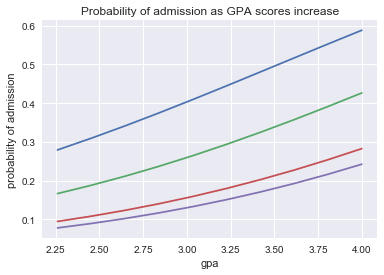

In [163]:
for num in combos['pres'].unique():
    if num == 1.0:
        tempDf = df[(df['pres_4.0'] == 0) & (df['pres_2.0'] == 0) & (df['pres_3.0'] == 0)]
    else:
        tempDf = df[df['pres_'+str(num)] == 1]
    tempDf = tempDf.groupby(['gpa'])['gpa','admit_pred'].mean()
    pyplot.plot(tempDf['gpa'], tempDf['admit_pred'])

pyplot.xlabel('gpa')
pyplot.ylabel("probability of admission")
pyplot.title("Probability of admission as GPA scores increase")
pyplot.show()